## Imports

In [6]:
import os
import shutil
import pybedtools
import subprocess
import pandas as pd
import statsmodels.api as sm
from scipy import stats

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Get ADPD Metadata

In [3]:
metadata = pd.read_excel('/oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/190215_Brain-ControlsOnly_Metadata_Merged.xlsx')
display(metadata.head())
display(metadata.shape)

,OldName,NewName,HarmonizedName,Bam,Contrast,Type,Group,Region,RegionMod,PatientID,TypeMod,Cohort,TissueCenter,TypeGroup,xxx.TechRep,Batch,xxx.Sample,xxx.Library,xxx.BioRep,xxx.TechRep.1,Pool,MAPT,xxx.race,Gender,xxx.expired_age,PMI,Mutation,MutationType,xxx.last_mmse_test_score,ApoE,xxx.last_mmse_test_date,xxx.motor_updrs_score_on,xxx.motor_updrs_score_off,xxx.motor_updrs_score_months_prior_to_death,xxx.Control,xxx.AD,xxx.PD,xxx.DLB,xxx.VAD,xxx.PSP,xxx.HS,xxx.DLDH,xxx.MND,xxx.CBD,xxx.PICKS,xxx.HD,xxx.MSA,xxx.ARG,xxx.CWMR,xxx.dementia_nos,xxx.MS,xxx.CAA,xxx.MCI,xxx.LBS,xxx.BRAIN_ABNORMAL,xxx.ACUTE_INFARCTS,xxx.PlaqueF,xxx.PlaqueT,xxx.PlaqueP,xxx.PlaqueH,xxx.PlaqueE,xxx.PlaqueTotal,xxx.Plaque density,xxx.TangleF,xxx.TangleT,xxx.TangleP,xxx.TangleE,xxx.TangleH,xxx.TangleTotal,xxx.Cerad NP,xxx.Braak score,xxx.NIA-R,xxx.Unified LB Stage,xxx.infarct_total_volume,xxx.infarct_cerebral_total_volume,xxx.obt,xxx.brain_stem_ix_x,xxx.brain_stem_lc,xxx.bf_amygdala,xxx.bf_nbm,xxx.brain_stem_sn,xxx.bf_trans,xxx.bf_cing,xxx.nctx_temporal,xxx.nctx_frontal,xxx.sum_lb_density,xxx.nctx_parietal,xxx.submondibular_gland,xxx.PathDXSummary,xxx.calc_NIA_AA,xxx.calc_thalPhase,xxx.micro_lewyBodyEvidenceTEXT,xxx.calc_HAAS_cerebralMicroinfarcts,xxx.calc_HAAS_deepGrayMicroinfarcts,xxx.AP_freshBrainWeight,xxx.CONS_CL_DX,xxx.CONS_CL_DX_UNK_OTHER,xxx.PRIMARY_NP_DX,xxx.CONTRIBUTING_NP_DX,xxx.Interval between death and last MMSE,xxx.ch_lastCasiScore,xxx.ch_lastCasiDate,xxx.micro_AmyloidAngiopathyOccipitalLobe_ID,xxx.GE_atherosclerosis_ID,xxx.calc_A,xxx.calc_B,xxx.C,xxx.CognitiveStatus
0,PD_00_38_CTRL_CAUD_X014_S01_L001_B1_T1_P025,PD_00_38_CTRL_CAUD_X014_S01_L001_B1_T1_P025,CTRL_CAUD_PD_00x38xx_X014_S01_L001_B1_T1_P025,/oak/stanford/groups/howchang/users/mcorces/PD...,CTRL_CAUD,CTRL,CTRL,CAUD,CAUD,00_38,CTRL,PD,UA,CTRL_CAUD,PD_00_38_CTRL_CAUD,PD_X014,S01,L001,B1,T1,PD_P025,H2,White,Female,91,2.0,NaN,NaN,NaN,2_3,NaN,0.0,16.0,19.0,yes,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,0.0,0.0,0.0,0.0,0.0,0.0,zero,0.0,0.0,0.0,1.25,0.5,1.75,not AD,II,criteria not met,0. No Lewy bodies,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,Diseased Control; Left hippocampal sclerosis; ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PD_00_38_CTRL_CAUD_X014_S01_L002_B1_T2_P028,PD_00_38_CTRL_CAUD_X014_S01_L002_B1_T2_P028,CTRL_CAUD_PD_00x38xx_X014_S01_L002_B1_T2_P028,/oak/stanford/groups/howchang/users/mcorces/PD...,CTRL_CAUD,CTRL,CTRL,CAUD,CAUD,00_38,CTRL,PD,UA,CTRL_CAUD,PD_00_38_CTRL_CAUD,PD_X014,S01,L002,B1,T2,PD_P028,H2,White,Female,91,2.0,NaN,NaN,NaN,2_3,NaN,0.0,16.0,19.0,yes,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,0.0,0.0,0.0,0.0,0.0,0.0,zero,0.0,0.0,0.0,1.25,0.5,1.75,not AD,II,criteria not met,0. No Lewy bodies,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,Diseased Control; Left hippocampal sclerosis; ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PD_00_38_CTRL_HIPP_X002_S11_L045_B1_T1_P002,PD_00_38_CTRL_HIPP_X002_S11_L045_B1_T1_P002,CTRL_HIPP_PD_00x38xx_X002_S11_L045_B1_T1_P002,/oak/stanford/groups/howchang/users/mcorces/PD...,CTRL_HIPP,CTRL,CTRL,HIPP,HIPP,00_38,CTRL,PD,UA,CTRL_HIPP,PD_00_38_CTRL_HIPP,PD_X002,S11,L045,B1,T1,PD_P002,H2,White,Female,91,2.0,NaN,NaN,NaN,2_3,NaN,0.0,16.0,19.0,yes,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,0.0,0.0,0.0,0.0,0.0,0.0,zero,0.0,0.0,0.0,1.25,0.5,1.75,not AD,II,criteria not met,0. No Lewy bodies,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,Diseased Control; Left hippocampal sclerosis; ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PD_00_38_CTRL_HIPP_X002_S11_L046_B1_T2_P003,PD_00_38_CTRL_HIPP_X002_S11_L046_B1_T2_P003,CTRL_HIPP_PD_00x38xx_X002_S11_L046_B1_T2_P003,/oak/stanford/groups/howchang/users/mcorces/PD...,CTRL_HIPP,CTRL,CTRL,HIPP,HIPP,00_38,CTRL,PD,UA,CTRL_HIPP,PD_00_38_CTRL_HIPP,PD_X002,S11,L046,B1,T2,PD_P003,H2,White,Female

(268, 108)

## Get Bams for each Patient

In [4]:
display(metadata['PatientID'].unique())
patients = list(metadata['PatientID'].unique())

array(['00_38', '01_31', '01_37', '03_15', '03_39', '03_41', '03_66',
       '04_38', '05_16', '06_0615', '06_1516', '06_57', '07_1058',
       '07_1144', '07_1287', '07_28', '08_0298', '08_0712', '08_90',
       '09_1589', '09_35', '09_50', '10_0867', '11_0311', '11_0393',
       '13_0038', '13_0962', '13_1226', '14_0380', '14_0513', '14_0586',
       '14_0941', '14_1018', '14_1383', '15_1023', '15_1025', '15_78',
       '16_10', '16_32'], dtype=object)

In [5]:
with open('/oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/ctrl_bams.txt') as infile:
    ctrl_bams = infile.readlines()
multi_bam_pats = []
for pat in patients:
    print(pat)
    patient_bams = []
    for bam in ctrl_bams:
        if pat in bam:
            patient_bams.append(bam)
    if len(patient_bams) > 1:
        multi_bam_pats.append(pat)
        patient_bams.sort()
        if not os.path.isdir('/oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/allelic_imbalance/quasar/input/' + pat):
            os.mkdir('/oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/allelic_imbalance/quasar/input/' + pat)
        if not os.path.isdir('/oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/allelic_imbalance/quasar/output/' + pat):
            os.mkdir('/oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/allelic_imbalance/quasar/output/' + pat)
        with open('/oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/allelic_imbalance/quasar/bam_lists/' + pat + '_ctrl_bams.txt', 'w') as outfile:
            for bam in patient_bams:
                outfile.write(bam)

00_38
01_31
01_37
03_15
03_39
03_41
03_66
04_38
05_16
06_0615
06_1516
06_57
07_1058
07_1144
07_1287
07_28
08_0298
08_0712
08_90
09_1589
09_35
09_50
10_0867
11_0311
11_0393
13_0038
13_0962
13_1226
14_0380
14_0513
14_0586
14_0941
14_1018
14_1383
15_1023
15_1025
15_78
16_10
16_32


## Make Input Files

In [ ]:
# for pat in multi_bam_pats:
#     print(pat)
#     with open('/oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/allelic_imbalance/quasar/bam_lists/' + pat + '_ctrl_bams.txt') as infile:
#         pat_bams = [i.strip() for i in infile.readlines()]
#         for bam in pat_bams:
#             bam_name = bam.split('/')[10]
#             mpileup_cmd = 'sbatch --export=ALL -n 1 -t 10:00 -p akundaje --mail-type=ALL -J ' + bam_name + ' run_mpileup.sh ' + bam + ' ' + bam_name      
#             print("MPILEUP")
#             print(mpileup_cmd)
#             ! {mpileup_cmd}
#             #format_cmd = "zcat /oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/allelic_imbalance/quasar/pileup/" + bam_name + ".pileup.gz | awk -v OFS='\t' '{ if ($4>0 && $5 !~ /[^\^][<>]/ && $5 !~ /\+[0-9]+[ACGTNacgtn]+/ && $5 !~ /-[0-9]+[ACGTNacgtn]+/ && $5 !~ /[^\^]\*/) print $1,$2-1,$2,$3,$4,$5,$6}' | sortBed -i stdin | intersectBed -a stdin -b /oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/allelic_imbalance/snps/hg38_1KG_ADPD_snps.bed -wo | cut -f 1-7,11-14 | gzip > /oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/allelic_imbalance/quasar/pileup_beds/" + bam_name + ".pileup.bed.gz"
#             #print(format_cmd)
#             #print("FORMAT")
#             #format_cmd = format_cmd.split()
#             #ret = subprocess.call(format_cmd)
#             #r_cmd = "R --vanilla --args /oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/allelic_imbalance/quasar/pileup_beds/" + bam_name + ".pileup.bed.gz < /users/soumyak/QuASAR/scripts/convertPileupToQuasar.R"
#             #print(r_cmd)
#             #print("R")
#             #r_cmd = r_cmd.split()
#             #ret = r_cmd.split()

In [29]:
for item in os.listdir('/oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/allelic_imbalance/quasar/input/all'):
    pat = item.split('_')[2] + '_' + item.split('_')[3].split('.')[0]
    print(pat)
    shutil.move('/oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/allelic_imbalance/quasar/input/all/' + item, '/oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/allelic_imbalance/quasar/input/' + pat + '/')

04_38
10_0867
14_0586
07_28
10_0867
14_0586
14_0941
07_1287
09_1589
03_41
15_1023
11_0311
16_10
05_16
14_1018
03_41
06_1516
03_15
14_1383
13_1226
15_1023
03_39
13_0038
09_35
14_0941
13_0962
05_16
04_38
09_50
00_38
13_0038
06_1516
08_0298
00_38
16_32
05_16
07_1287
11_0393
03_15
09_35
15_78
11_0311
03_39
14_1383
14_0380
09_35
14_0380
10_0867
14_1383
15_1025
00_38
01_31
03_39
06_1516
14_1018
16_10
03_66
07_1144
15_1025
14_0513
04_38
09_50
03_15
16_32
07_1287
14_0380
09_50
00_38
03_41
03_66
03_39
07_1058
15_1025
15_1023
04_38
00_38
14_0586
09_1589
03_66
13_0962
15_1023
16_32
14_0513
15_1025
13_1226
07_1144
14_0513
14_0513
07_1144
15_78
04_38
09_50
09_35
14_0586
03_66
11_0393
13_0962
00_38
08_0712
07_1144
04_38
03_41
03_41
13_0038
14_0380
09_1589
13_0962
03_66
15_78
05_16
15_78
07_1058
05_16
01_31
16_32
11_0393
05_16
08_0712
08_0298
09_35
14_1018
14_1383
16_10
09_35
13_1226
03_39
11_0393
07_28
13_0038
15_78
16_32
07_1058
13_1226
10_0867
14_1018


In [33]:
for pat in multi_bam_pats:
    print(pat)
    ! cat /oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/allelic_imbalance/quasar/output/{pat}/*.inference.txt | grep -v ^annotations.rsID | sort -k6,6n > /oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/allelic_imbalance/quasar/output/{pat}/all_{pat}_output.txt
! cat /oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/allelic_imbalance/quasar/output/*/all_*_output.txt | sort -k6,6n> /oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/allelic_imbalance/quasar/output/all_patients_output.txt

00_38
grep: warning: GREP_OPTIONS is deprecated; please use an alias or script
01_31
grep: warning: GREP_OPTIONS is deprecated; please use an alias or script
03_15
grep: warning: GREP_OPTIONS is deprecated; please use an alias or script
03_39
grep: warning: GREP_OPTIONS is deprecated; please use an alias or script
03_41
grep: warning: GREP_OPTIONS is deprecated; please use an alias or script
03_66
grep: warning: GREP_OPTIONS is deprecated; please use an alias or script
04_38
grep: warning: GREP_OPTIONS is deprecated; please use an alias or script
05_16
grep: warning: GREP_OPTIONS is deprecated; please use an alias or script
06_1516
grep: warning: GREP_OPTIONS is deprecated; please use an alias or script
07_1058
grep: warning: GREP_OPTIONS is deprecated; please use an alias or script
07_1144
grep: warning: GREP_OPTIONS is deprecated; please use an alias or script
07_1287
grep: warning: GREP_OPTIONS is deprecated; please use an alias or script
07_28
grep: warning: GREP_OPTIONS is depreca

In [13]:
for patient in multi_bam_pats:
    print(patient)
    for sample in [i for i in os.listdir('/oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/allelic_imbalance/quasar/output/'
                                    + patient) if i.endswith('inference.txt')]:
        print(sample)
        sample_output = pd.read_csv('/oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/allelic_imbalance/quasar/output/'
                                    + patient + '/' + sample, sep='\t')
        sample_output['bh_qvalue'] = sm.stats.fdrcorrection(list(sample_output['pval2.het.ind.']))[1]
        sample_output['region'] = sample.split('_')[1]
        sample_output['patient'] = patient
        sample_output.to_csv('/oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/allelic_imbalance/quasar/output/'
                                + patient + '/' + sample.replace('inference', 'bh_corrected'), sep='\t', index=False)
        #display(sample_output.head())
        #display(sample_output.shape)

00_38
CTRL_MDFG_00_38.inference.txt
CTRL_CAUD_00_38.inference.txt
CTRL_MDTG_00_38.inference.txt
CTRL_HIPP_00_38.inference.txt
CTRL_PTMN_00_38.inference.txt
CTRL_SUNI_00_38.inference.txt
01_31
CTRL_CAUD_01_31.inference.txt
CTRL_SUNI_01_31.inference.txt
03_15
CTRL_MDTG_03_15.inference.txt
CTRL_SUNI_03_15.inference.txt
CTRL_CAUD_03_15.inference.txt
03_39
CTRL_PTMN_03_39.inference.txt
CTRL_MDFG_03_39.inference.txt
CTRL_CAUD_03_39.inference.txt
CTRL_MDTG_03_39.inference.txt
CTRL_SUNI_03_39.inference.txt
03_41
CTRL_SUNI_03_41.inference.txt
CTRL_CAUD_03_41.inference.txt
CTRL_MDTG_03_41.inference.txt
CTRL_MDFG_03_41.inference.txt
CTRL_PTMN_03_41.inference.txt
03_66
CTRL_PTMN_03_66.inference.txt
CTRL_MDTG_03_66.inference.txt
CTRL_MDFG_03_66.inference.txt
CTRL_SUNI_03_66.inference.txt
CTRL_CAUD_03_66.inference.txt
04_38
CTRL_SUNI_04_38.inference.txt
CTRL_PTMN_04_38.inference.txt
CTRL_CAUD_04_38.inference.txt
CTRL_HIPP_04_38.inference.txt
CTRL_MDTG_04_38.inference.txt
CTRL_MDFG_04_38.inference.tx

In [14]:
for pat in multi_bam_pats:
    print(pat)
    ! cat /oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/allelic_imbalance/quasar/output/{pat}/*.bh_corrected.txt | grep -v ^annotations.rsID | sort -k7,7n > /oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/allelic_imbalance/quasar/output/{pat}/all_{pat}_bh_corrected.txt
! cat /oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/allelic_imbalance/quasar/output/*/all_*_bh_corrected.txt | sort -k7,7n > /oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/allelic_imbalance/quasar/output/all_patients_bh_corrected.txt

00_38
grep: warning: GREP_OPTIONS is deprecated; please use an alias or script
01_31
grep: warning: GREP_OPTIONS is deprecated; please use an alias or script
03_15
grep: warning: GREP_OPTIONS is deprecated; please use an alias or script
03_39
grep: warning: GREP_OPTIONS is deprecated; please use an alias or script
03_41
grep: warning: GREP_OPTIONS is deprecated; please use an alias or script
03_66
grep: warning: GREP_OPTIONS is deprecated; please use an alias or script
04_38
grep: warning: GREP_OPTIONS is deprecated; please use an alias or script
05_16
grep: warning: GREP_OPTIONS is deprecated; please use an alias or script
06_1516
grep: warning: GREP_OPTIONS is deprecated; please use an alias or script
07_1058
grep: warning: GREP_OPTIONS is deprecated; please use an alias or script
07_1144
grep: warning: GREP_OPTIONS is deprecated; please use an alias or script
07_1287
grep: warning: GREP_OPTIONS is deprecated; please use an alias or script
07_28
grep: warning: GREP_OPTIONS is depreca

In [15]:
print(multi_bam_pats)

['00_38', '01_31', '03_15', '03_39', '03_41', '03_66', '04_38', '05_16', '06_1516', '07_1058', '07_1144', '07_1287', '07_28', '08_0298', '08_0712', '09_1589', '09_35', '09_50', '10_0867', '11_0311', '11_0393', '13_0038', '13_0962', '13_1226', '14_0380', '14_0513', '14_0586', '14_0941', '14_1018', '14_1383', '15_1023', '15_1025', '15_78', '16_10', '16_32']


In [16]:
for patient in multi_bam_pats:
    print(patient)
    with pd.ExcelWriter('/oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/allelic_imbalance/quasar/output/'
                        + patient + '/' + patient + '.xlsx') as writer:
        for sample in [i for i in os.listdir('/oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/allelic_imbalance/quasar/output/'
                                    + patient) if i.endswith('.bh_corrected.txt')]:
            print(sample)
            sample_output = pd.read_csv('/oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/allelic_imbalance/quasar/output/'
                                        + patient + '/' + sample, sep='\t')
            sample_name = sample.split('_')[1]
            print(sample_name)
            sample_output.to_excel(writer, sheet_name=sample_name, index=False)
        genotypes = pd.read_csv('/oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/allelic_imbalance/quasar/output/'
                                    + patient + '/genotypes.txt', sep='\t')
        genotypes.to_excel(writer, sheet_name='genotypes', index=False)

00_38
CTRL_MDTG_00_38.bh_corrected.txt
MDTG
CTRL_MDFG_00_38.bh_corrected.txt
MDFG
CTRL_PTMN_00_38.bh_corrected.txt
PTMN
CTRL_HIPP_00_38.bh_corrected.txt
HIPP
CTRL_SUNI_00_38.bh_corrected.txt
SUNI
CTRL_CAUD_00_38.bh_corrected.txt
CAUD
01_31
CTRL_CAUD_01_31.bh_corrected.txt
CAUD
CTRL_SUNI_01_31.bh_corrected.txt
SUNI
03_15
CTRL_SUNI_03_15.bh_corrected.txt
SUNI
CTRL_MDTG_03_15.bh_corrected.txt
MDTG
CTRL_CAUD_03_15.bh_corrected.txt
CAUD
03_39
CTRL_MDTG_03_39.bh_corrected.txt
MDTG
CTRL_SUNI_03_39.bh_corrected.txt
SUNI
CTRL_PTMN_03_39.bh_corrected.txt
PTMN
CTRL_MDFG_03_39.bh_corrected.txt
MDFG
CTRL_CAUD_03_39.bh_corrected.txt
CAUD
03_41
CTRL_MDFG_03_41.bh_corrected.txt
MDFG
CTRL_SUNI_03_41.bh_corrected.txt
SUNI
CTRL_MDTG_03_41.bh_corrected.txt
MDTG
CTRL_PTMN_03_41.bh_corrected.txt
PTMN
CTRL_CAUD_03_41.bh_corrected.txt
CAUD
03_66
CTRL_SUNI_03_66.bh_corrected.txt
SUNI
CTRL_MDTG_03_66.bh_corrected.txt
MDTG
CTRL_CAUD_03_66.bh_corrected.txt
CAUD
CTRL_PTMN_03_66.bh_corrected.txt
PTMN
CTRL_MDFG_03_6

In [18]:
all_corrected = pd.read_csv('/oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/allelic_imbalance/quasar/output/all_patients_bh_corrected.txt', sep='\t', header=None)
all_corrected.sort_values(by=6, inplace=True)
all_corrected.columns = ['rsid', 'chrom', 'pos', 'beta', 'se', 'pval', 'bh_qval', 'region', 'patient']
sig_snps = all_corrected.loc[all_corrected['bh_qval'] < 0.10]
sig_snps.to_csv('/oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/allelic_imbalance/quasar/output/quasar_significant_snps.csv', sep='\t', index=False)
unique_sig_snps = sig_snps.drop_duplicates(subset='rsid')
unique_sig_snps.to_csv('/oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/allelic_imbalance/quasar/output/unique_quasar_significant_snps.csv', sep='\t', index=False)

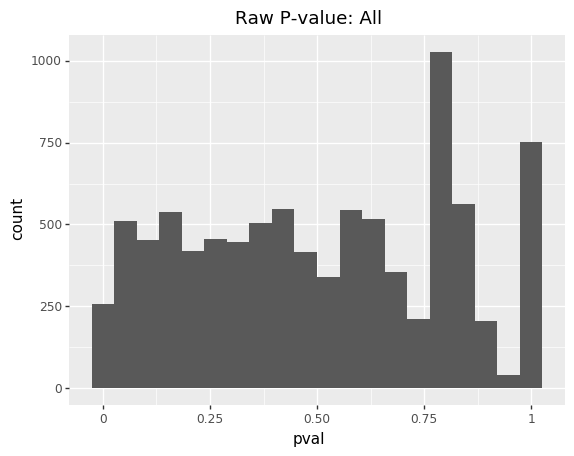

<ggplot: (8740465466267)>

In [21]:
%matplotlib inline
import plotnine as p9

display(p9.ggplot(data=all_corrected, mapping=p9.aes(x='pval')) + p9.geom_histogram(bins=20) + p9.labs(title='Raw P-value: All'))

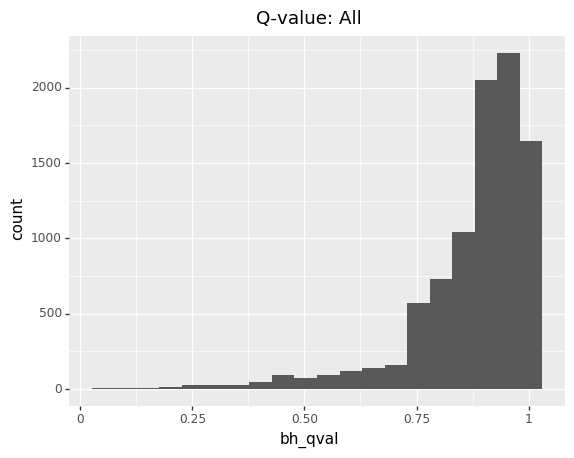

<ggplot: (-9223363296404592191)>

In [22]:
display(p9.ggplot(data=all_corrected, mapping=p9.aes(x='bh_qval')) + p9.geom_histogram(bins=20) + p9.labs(title='Q-value: All'))

In [24]:
patient_0038 = pd.read_csv('/oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/allelic_imbalance/quasar/output/00_38/all_00_38_bh_corrected.txt', sep='\t', header=None)
patient_0038.sort_values(by=6, inplace=True)
patient_0038.columns = ['rsid', 'chrom', 'pos', 'beta', 'se', 'pval', 'bh_qval', 'region', 'patient']
patient_0038.head()

,rsid,chrom,pos,beta,se,pval,bh_qval,region,patient
0,rs1237999,chr11,86103987,1.967640,0.519151,0.000524,0.044517,PTMN,00_38
1,rs10256524,chr7,23105327,-1.848137,0.695470,0.007875,0.235363,PTMN,00_38
2,rs2693359,chr17,45584384,1.539346,0.583233,0.008307,0.235363,PTMN,00_38
3,rs62060947,chr17,46192555,2.322031,0.821355,0.008707,0.252509,HIPP,00_38
4,rs483082,chr19,44912920,2.345276,0.813394,0.005452,0.328352,MDTG,00_38


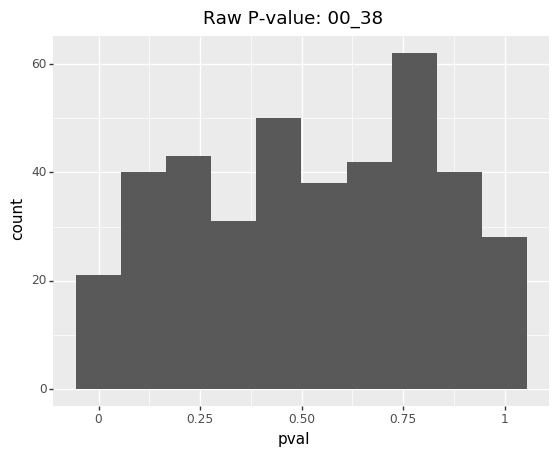

<ggplot: (-9223363296404779804)>

In [28]:
display(p9.ggplot(data=patient_0038, mapping=p9.aes(x='pval')) + p9.geom_histogram(bins=10) + p9.labs(title='Raw P-value: 00_38'))

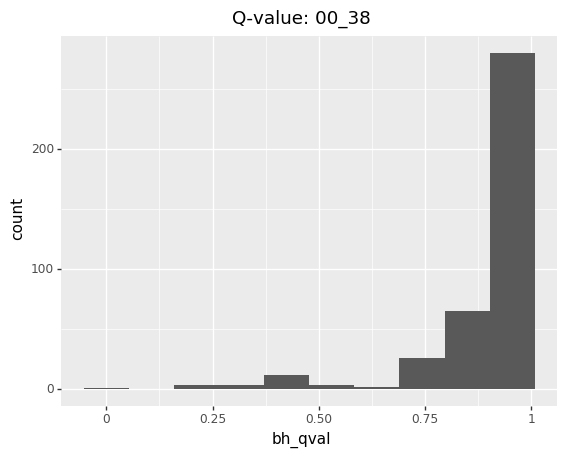

<ggplot: (-9223363296404797913)>

In [29]:
display(p9.ggplot(data=patient_0038, mapping=p9.aes(x='bh_qval')) + p9.geom_histogram(bins=10) + p9.labs(title='Q-value: 00_38'))

In [30]:
ptmn_0038 = pd.read_csv('/oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/allelic_imbalance/quasar/output/00_38/CTRL_PTMN_00_38.bh_corrected.txt', sep='\t', header=None)
ptmn_0038.sort_values(by=6, inplace=True)
ptmn_0038.columns = ['rsid', 'chrom', 'pos', 'beta', 'se', 'pval', 'bh_qval', 'region', 'patient']
ptmn_0038.head()

,rsid,chrom,pos,beta,se,pval,bh_qval,region,patient
1,rs1237999,chr11,86103987,1.96764015281829,0.519150977022145,0.000523732965682644,0.04451730208302474,PTMN,00_38
2,rs10256524,chr7,23105327,-1.8481372070365,0.6954698376529069,0.007874740623407091,0.23536327791789025,PTMN,00_38
3,rs2693359,chr17,45584384,1.53934580959019,0.583232936121904,0.00830693922063142,0.23536327791789025,PTMN,00_38
42,rs2072368,chr7,23106492,0.26004064698192103,0.49630804068844403,0.600313248121245,0.9791724243670814,PTMN,00_38
58,rs7947450,chr11,47408352,0.11092744979471,0.4163444863957129,0.7899066052700551,0.9791724243670814,PTMN,00_38


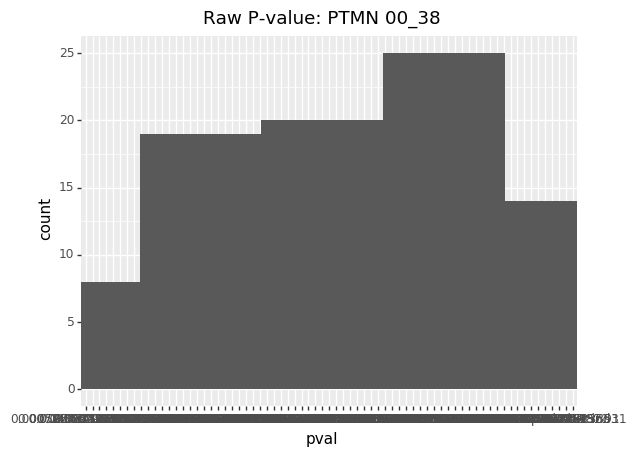

<ggplot: (-9223363296531066396)>

In [36]:
display(p9.ggplot(data=ptmn_0038, mapping=p9.aes(x='pval')) + p9.geom_histogram() + p9.labs(title='Raw P-value: PTMN 00_38'))

In [37]:
display(p9.ggplot(data=ptmn_0038, mapping=p9.aes(x='bh_qval')) + p9.geom_histogram() + p9.labs(title='Raw P-value: PTMN 00_38'))

KeyError: 'weight'

In [3]:
bias_snps = ['rs1237999','rs3755519','rs6781790','rs55682376','rs12119232','rs147889095',
                'rs3104768','rs58392387','rs17631303','rs17762308','rs56327054','rs12150223',
                'rs2532307','rs72914882','rs72914893','rs72914895','rs600834','rs600850','rs11077365',
                'rs72907463','rs691362','rs691346','rs691331','rs691328','rs691317','rs6501212',
                'rs76516995','rs10182292','rs744373','rs12493578']

In [14]:
len(bias_snps)

30

In [8]:
all_snps = pd.read_csv('/oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/allelic_imbalance/snps/hg38_snps_1KG_ADPD.bed', header=None, sep='\t')
all_snps.head()

,0,1,2,3,4,5,6
0,chr1,39822150,39822151,rs34640847,G,A,0.118810
1,chr1,39822244,39822245,rs36015266,C,T,0.118810
2,chr1,39822259,39822260,rs61779808,T,A,0.098443
3,chr1,39822791,39822792,rs61779809,C,T,0.118810
4,chr1,39825224,39825225,rs72666941,C,A,0.095248


In [13]:
bias_bed = all_snps.loc[all_snps[3].apply(lambda x : x in bias_snps)]
display(bias_bed.head())
display(bias_bed.shape)

,0,1,2,3,4,5,6
151,chr1,171742011,171742012,rs12119232,A,C,0.145767
1210,chr11,86103987,86103988,rs1237999,G,A,0.670327
1967,chr16,52592483,52592484,rs3104768,G,A,0.520767
2272,chr17,44220520,44220521,rs58392387,A,G,0.415335
2368,chr17,45439035,45439036,rs17631303,A,G,0.072484


(29, 7)

In [16]:
bias_bed.to_csv('/oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/allelic_imbalance/snps/bias_snps.bed', sep='\t', header=False, index=False)

In [19]:
bias_bed_rsid = list(bias_bed[3])
for i in bias_snps:
    if i not in bias_bed_rsid:
        print(i)

rs147889095
